### Proyecto 1: Clasificacion lineal con el Perceptron Simple. 

#### i. Cargue el conjunto de datos ”wine” de scikit-learn.

In [1]:
from sklearn.datasets import load_wine
import numpy as np
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

# Cargamos el conjunto de datos
data = load_wine()
# Accedemos a los datos
X = data.data  # Datos (características)
y = data.target

# Imprimimos información sobre el conjunto de datos
print("Características:", data.feature_names)
print("Etiquetas:", data.target_names)
print("Forma de los datos:", X.shape)
print("Cantidad de etiquetas:", len(y))
print(X)

Características: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Etiquetas: ['class_0' 'class_1' 'class_2']
Forma de los datos: (178, 13)
Cantidad de etiquetas: 178
[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


Para empezar importamos las librerias de sklearn correspondientes, accedemos a la data a traves del metodo "load_wine()", posteriormente la separamos en 2 vectores. Ela lista "X" corresponde a los vectores de entrada y la lista "y" corresponde a la etiqueta asociada a cada vector de entrada

In [2]:
# Creamos un objeto StandardScaler
scaler = StandardScaler()
# Aplicamos la normalización a los datos
X_normalizado = scaler.fit_transform(X)
# Imprimimos los datos normalizados
X = X_normalizado
print(X)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


Arriba estamos aplicando normalizacion a los datos para que nuestro modelo pueda funcionar correctamente para ello hacemos uso de la herramienta StandardScaler de sklearn

#### ii. Seleccione las caracteristicas: ”alcohol”, ”magnesium” y ”color intensity”.

#### iii Seleccione, entre los datos anteriores, dos tipos de vino que le permitan realizar
#### una clasificaion binaria.
#### iv. Divida la data en dos subconjuntos: uno de entrenamiento y uno de prueaba

In [3]:
indices_caracteristicas = [0, 4, 9]  # Índices correspondientes a las características: "alcohol", "magnesium", "color intensity"

# Filtramos el conjunto de datos con las características seleccionadas y lo dividimos en conjuntos de entranmiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

X_filtrado = X_train[:,indices_caracteristicas]
X_filtrado = X_filtrado[y_train != 2]
y_filtrado = y_train[y_train != 2]
y_filtrado = y_train[y_train !=2]

print("cantidad de datos de entrenamiento: ",X_filtrado.__len__())
print("cantidad de detiquetas de entrenamiento: ",y_filtrado.__len__())
print("cantidad de datos de prueba: ",X_test.__len__())

cantidad de datos de entrenamiento:  102
cantidad de detiquetas de entrenamiento:  102
cantidad de datos de prueba:  36


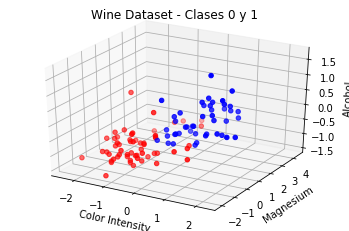

In [4]:
# Creamos una figura tridimensional
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# Graficamos los datos en 3D
ax.scatter(X_filtrado[:, 0], X_filtrado[:, 1], X_filtrado[:, 2], c=y_filtrado, cmap='bwr')
# Etiquetas de los ejes
ax.set_xlabel('Color Intensity')
ax.set_ylabel('Magnesium')
ax.set_zlabel('Alcohol')
# Título del gráfico
ax.set_title('Wine Dataset - Clases 0 y 1')
# Mostramos el gráfico
plt.show()

Como se ve, se designo aproximadamente el 80% de los datos para entrenamiento y el 20% de los datos para prueba adicionalmente se filtro la data por solo 3 caracteristicas y se quito la etiqueta 2 que corresponde a la "clase2", dejanddonos con data que puedde ser clasificada de forma binaria

#### v. Usando los datos de entrenamiento, implemente un clasificador binario, basado en el algoritmo del Perceptron Simple.

In [5]:
class perceptronSimple:
    weights: list = [] #vector de pesos del perceptron
    inputs: list = []  #/ [ (0,0,0, 0 ),(0,0,1, 1)] lista de entradas del perceptron
    n_entradas = 0 #numero de entradas del perceptron
    learning_rate = 0.1 #factor de aprendizaje 
    b = 0 #sesgo del perceptron
   
    def activation_function(self,suma): #funcion de activacion
        return 1 if suma > 0.5 else 0
        
    def __init__(self, inputs:list, weights:list,learning_rate, n_entradas:int,b):
        self.inputs = inputs
        self.weights = weights
        self.learning_rate = learning_rate
        self.n_entradas = n_entradas
        self.b = b

    def suma_terminos(self,entrada): #producto punto
        suma:float = 0
        for j in range(self.n_entradas):
                suma += entrada[j] * self.weights[j]

        suma += self.b        
        return suma
    
    def actualizar_pesos(self, error, dato): #coreccion de cada peso del perceptron
        for i in range(self.weights.__len__()):
            self.weights[i] += error*self.inputs[dato][i]

        self.b += error*(self.b)   #se corrige el sesgo
        return    

    def fit(self,iterations:int):
        for i in range(iterations):
            errores = 0
            for j in range(self.inputs.__len__()):
                salida =  1 if self.suma_terminos(self.inputs[j]) > 0.5 else 0 #se toma la salidas
                e = self.learning_rate*(self.inputs[j][self.n_entradas] - salida) # se calcula el factor de correccion
                error = self.inputs[j][self.n_entradas] - salida #se calcula el error
                if error != 0.0 and error != -0.0:
                    errores = errores + 1
                    self.actualizar_pesos(e,j)
            random.shuffle(self.inputs) #si se barajea la data en cada iteracion el algoritmo converge mejor 
            if errores == 0:
                break

        return None
    
    def predecir(self,input):
        return 1 if self.suma_terminos(input) > 0.5 else 0

Creamos una clase que contrenda toda la logica y los atributos que le perteneceran al perceptron, al crear el perceptron nos pedira una lista de "inputs" esa lista contendra todos los datos de entrenamiento y la respuesta a aesa data.Ejemplo: inputs = [ [2.67, 8.8, 9, 0],[1.67, 0.8, 7, 1] ] en este caso tenemos 2 datos de entrenamiento cada uno posee 3 entradas y su salida es el 4 dato, la lista weights correspondera a la lista de pesos que tiene el perceptron al crearlo por primera vez se le ha de pasar esta lista para definir los pesos iniciales 


A continuacion ajustaremos la data para que se ajuste a nuestro perceptron 

In [6]:
inputs = list(X_filtrado)

inputs = []
i = 0
for data in list(X_filtrado):
    terna = []
    z = 0
    for j in range(data.__len__()):
        terna.insert(j,data[j])
        z = z + 1   
    terna.insert(z,y_filtrado[i])
    i = i + 1
    inputs.insert(i,terna)

for input in inputs:
    print(input)

[-0.7789802939543485, -0.8244150669255967, -0.24141293075762868, 1]
[0.08570518156202425, -0.12228166064446654, -0.5874689171270897, 0]
[-0.964270038707855, -0.5435617044131447, -1.020038900088916, 1]
[-0.40840080444733134, -0.05206832001635351, -1.0546444987258623, 1]
[0.41922672211833845, 0.7202784268928897, -0.8167310080968578, 1]
[0.19687902841412896, 0.08835836123987253, 0.2690196491373263, 0]
[-1.13720713381113, -0.19249500127257954, -0.7604969103118204, 1]
[-0.7172170457031782, 0.15857170186798555, -1.2882322895252485, 1]
[1.0245065549797987, -0.4031350231569186, 0.23441405050038017, 0]
[0.03629458296108759, -0.9648417481818228, -0.1981559324614462, 1]
[1.5062598913389207, 1.2819851519177938, 0.5718186372106048, 0]
[0.4809899703695087, -0.47334836378503165, -0.11164193586908086, 0]
[-0.6060431988510735, -1.035055088809936, -0.9162221041780778, 1]
[-0.828390892555283, 2.545825283223828, -0.7172399120156377, 1]
[0.34511082421693456, 0.7202784268928897, -0.1981559324614462, 0]
[-0.

Aqui simplemente se junto tanto el vector x como el vector y en una sola lista para que pueda ser consumida por el perceptron
A continuacion se creara y se entrenara el perceptron

In [7]:
perceptron = perceptronSimple(
    inputs=inputs,
    weights=[0,0,0],
    learning_rate=0.1,
    n_entradas=3,
    b=1
)
perceptron.fit(100)
print("PESOS FINALES DEL PERCEPTRON: ",perceptron.weights)
print("SESGO FINAL DEL PERCEPTRON: ",perceptron.b)

PESOS FINALES DEL PERCEPTRON:  [-0.3137156629710178, -0.07439458450820907, -0.163005966858499]
SESGO FINAL DEL PERCEPTRON:  0.31862115939741376


[{'clase': 0, 'aciertos': 14, 'errores': 0}, {'clase': 1, 'aciertos': 13, 'errores': 1}]


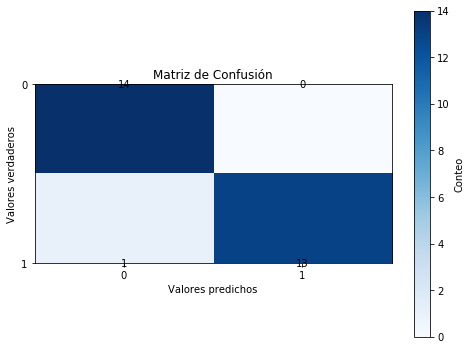

In [8]:
def matriz_confusion(data):
    matriz = []
    aciertosA = 0
    aciertosB = 0
    erroresA = 0
    erroresB = 0
    for i in range(data.__len__()):
        dato = data[i]
        prediccion = perceptron.predecir([dato[0],dato[1],dato[2]])
        if prediccion == dato[3]:
            if dato[3] == 0:
                aciertosA += 1
            else:
                aciertosB += 1
        else:
            if dato[3] == 0:
                erroresA += 1
            else:
                erroresB += 1
      
          
    matriz.insert(0,{'clase': 0, 'aciertos': aciertosA,'errores': erroresA})
    matriz.insert(1,{'clase': 1, 'aciertos': aciertosB,'errores': erroresB})
    return matriz

X_testfiltrado = X_test[:,indices_caracteristicas]
X_testfiltrado = X_testfiltrado[y_test != 2]
y_testfiltrado = y_test[y_test != 2]


inputs2 = []
i = 0
for data in list(X_testfiltrado):
    terna = []
    z = 0
    for j in range(data.__len__()):
        terna.insert(j,data[j])
        z = z + 1    
    terna.insert(z,y_testfiltrado[i])
    i = i + 1
    inputs2.insert(i,terna)

confusion = matriz_confusion(inputs2)
print(confusion)
confusion_list = confusion
# Obtener las clases y el tamaño de la matriz de confusión
classes = [item['clase'] for item in confusion_list]
num_classes = len(classes)
# Crear una matriz de confusión vacía
confusion_mat = np.zeros((num_classes, num_classes))
# Rellenar la matriz de confusión con los aciertos y errores de la lista
for i in range(num_classes):
    confusion_mat[i, i] = confusion_list[i]['aciertos']
    for j in range(num_classes):
        if i != j:
            confusion_mat[i, j] = confusion_list[i]['errores']
# Crear una figura para la matriz de confusión
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mat, interpolation='nearest', cmap='Blues')
# Configurar etiquetas y título
plt.title('Matriz de Confusión')
plt.colorbar(label='Conteo')
tick_marks = range(num_classes)
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)
plt.xlabel('Valores predichos')
plt.ylabel('Valores verdaderos')
# Añadir los valores en cada celda
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, int(confusion_mat[i, j]), ha='center', va='center', color='black')
# Mostrar la figura
plt.show()

Precisión del perceptron de scikit-learn: 0.9642857142857143
[[14  0]
 [ 1 13]]


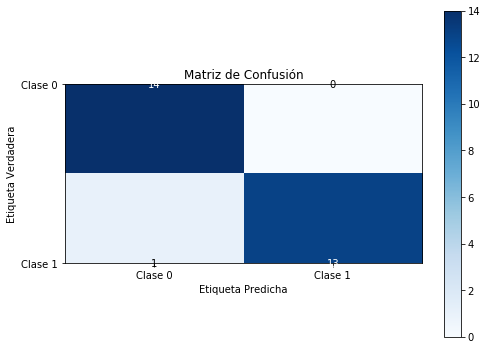

In [9]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

perceptron = Perceptron()
perceptron.fit(X_filtrado, y_filtrado)
y_pred = perceptron.predict(X_testfiltrado)

accuracy = accuracy_score(y_testfiltrado, y_pred)
print("Precisión del perceptron de scikit-learn:", accuracy)
conf = confusion_matrix(y_testfiltrado,y_pred)
print(conf)

plt.figure(figsize=(8, 6))
plt.imshow(conf, cmap='Blues')
# Configurar etiquetas y título
plt.colorbar()

thresh = conf.max() / 2
for i in range(conf.shape[0]):
    for j in range(conf.shape[1]):
        plt.text(j, i, format(conf[i, j], 'd'), ha="center", va="center",
                 color="white" if conf[i, j] > thresh else "black")

plt.xticks([0, 1], ['Clase 0', 'Clase 1'])
plt.yticks([0, 1], ['Clase 0', 'Clase 1'])
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión')
plt.show()

Como vemos el modelo de scikit-Learn goza de un 96% de presicion mientras que nuestro modelo con 100 iteraciones posee un 92% a un 96% de presicion si se varia la data de entrada en cada iteracion.